In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [4]:
#importing or loading the dataset
df = pd.read_csv('rain.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [7]:
#creating column of month, day and year analysis
import datetime
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   
3          NE           24.0         SE  ...      1012.8       NaN       NaN   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Month  Day  Year  
0     16.9     21.8         No            No     12    1  2008  
1     17.2     24.3         No            No     12    2  2008  
2     21.0     23.2         No            No     12    3  2008  
3     18.1     26.5         No            No     12    4  2008  
4     17.8     29.7         No            No     12    5  2008  

[5 rows x 26 columns]

Let us remove Date column, as we have already split them up to 3 colums of useful numerical data

In [11]:
df.drop('Date', axis=1, inplace=True)
#Checking of column names
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Day', 'Year'],
      dtype='object')

In [12]:
#Checking for data shape
df.shape

(8425, 25)

In [13]:
#Checking data types
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Month              int64
Day                int64
Year               int64
dtype: object

In [14]:
#Checking any null values
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Month               0
Day                 0
Year                0
dtype: int64

In [31]:
#Seperating categorical and numerical data data columns
categorical = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']
numerical = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
             'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
            'Temp3pm',  'Month', 'Day', 'Year']

In [32]:
#NaN handling, we can use mode imputation for missing values
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [33]:
#NaN handling, we can use mean imputation for missing values, but as mean is sensitve to outliers we have to address outliers properly before training the model 
for i in numerical:
    df[i] = df[i].fillna(df[i].mean())

In [34]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of Location : False
For column of MinTemp : False
For column of MaxTemp : False
For column of Rainfall : False
For column of Evaporation : False
For column of Sunshine : False
For column of WindGustDir : False
For column of WindGustSpeed : False
For column of WindDir9am : False
For column of WindDir3pm : False
For column of WindSpeed9am : False
For column of WindSpeed3pm : False
For column of Humidity9am : False
For column of Humidity3pm : False
For column of Pressure9am : False
For column of Pressure3pm : False
For column of Cloud9am : False
For column of Cloud3pm : False
For column of Temp9am : False
For column of Temp3pm : False
For column of RainToday : False
For column of RainTomorrow : False
For column of Month : False
For column of Day : False
For column of Year : False


In [35]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (8425, 25)
Size after:  (8425, 25)


In [36]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [37]:
#Checking of value counts in each columns categorical data
for i in categorical:
    print(df[i].value_counts(),'\n')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64 

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64 

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
ESE     462
W       462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64 

No     6435
Yes    1990
Name: RainToday, 

In [38]:
#Checking of value counts in each columns of numerical data
for i in numerical:
    print(df[i].value_counts(),'\n')

 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
 26.900000     1
-1.700000      1
-1.400000      1
-1.200000      1
-0.800000      1
Name: MinTemp, Length: 286, dtype: int64 

19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 332, dtype: int64 

0.000000     5299
0.200000      406
2.805913      240
0.400000      177
0.600000      116
             ... 
6.300000        1
28.000000       1
38.800000       1
41.200000       1
15.700000       1
Name: Rainfall, Length: 251, dtype: int64 

5.389395     3512
4.000000      180
3.000000      163
2.400000      147
2.200000      146
             ... 
17.600000       1
22.400000       1
18.600000       1
14.000000       1
15.600000       1
Name: Evaporation, Length: 117, dtype: int64 

7.632205     3994
0.000000      166
11.100000      68
11.200000      67
11.000000      66
             ... 
2.500000   

In [40]:
len(numerical)

19

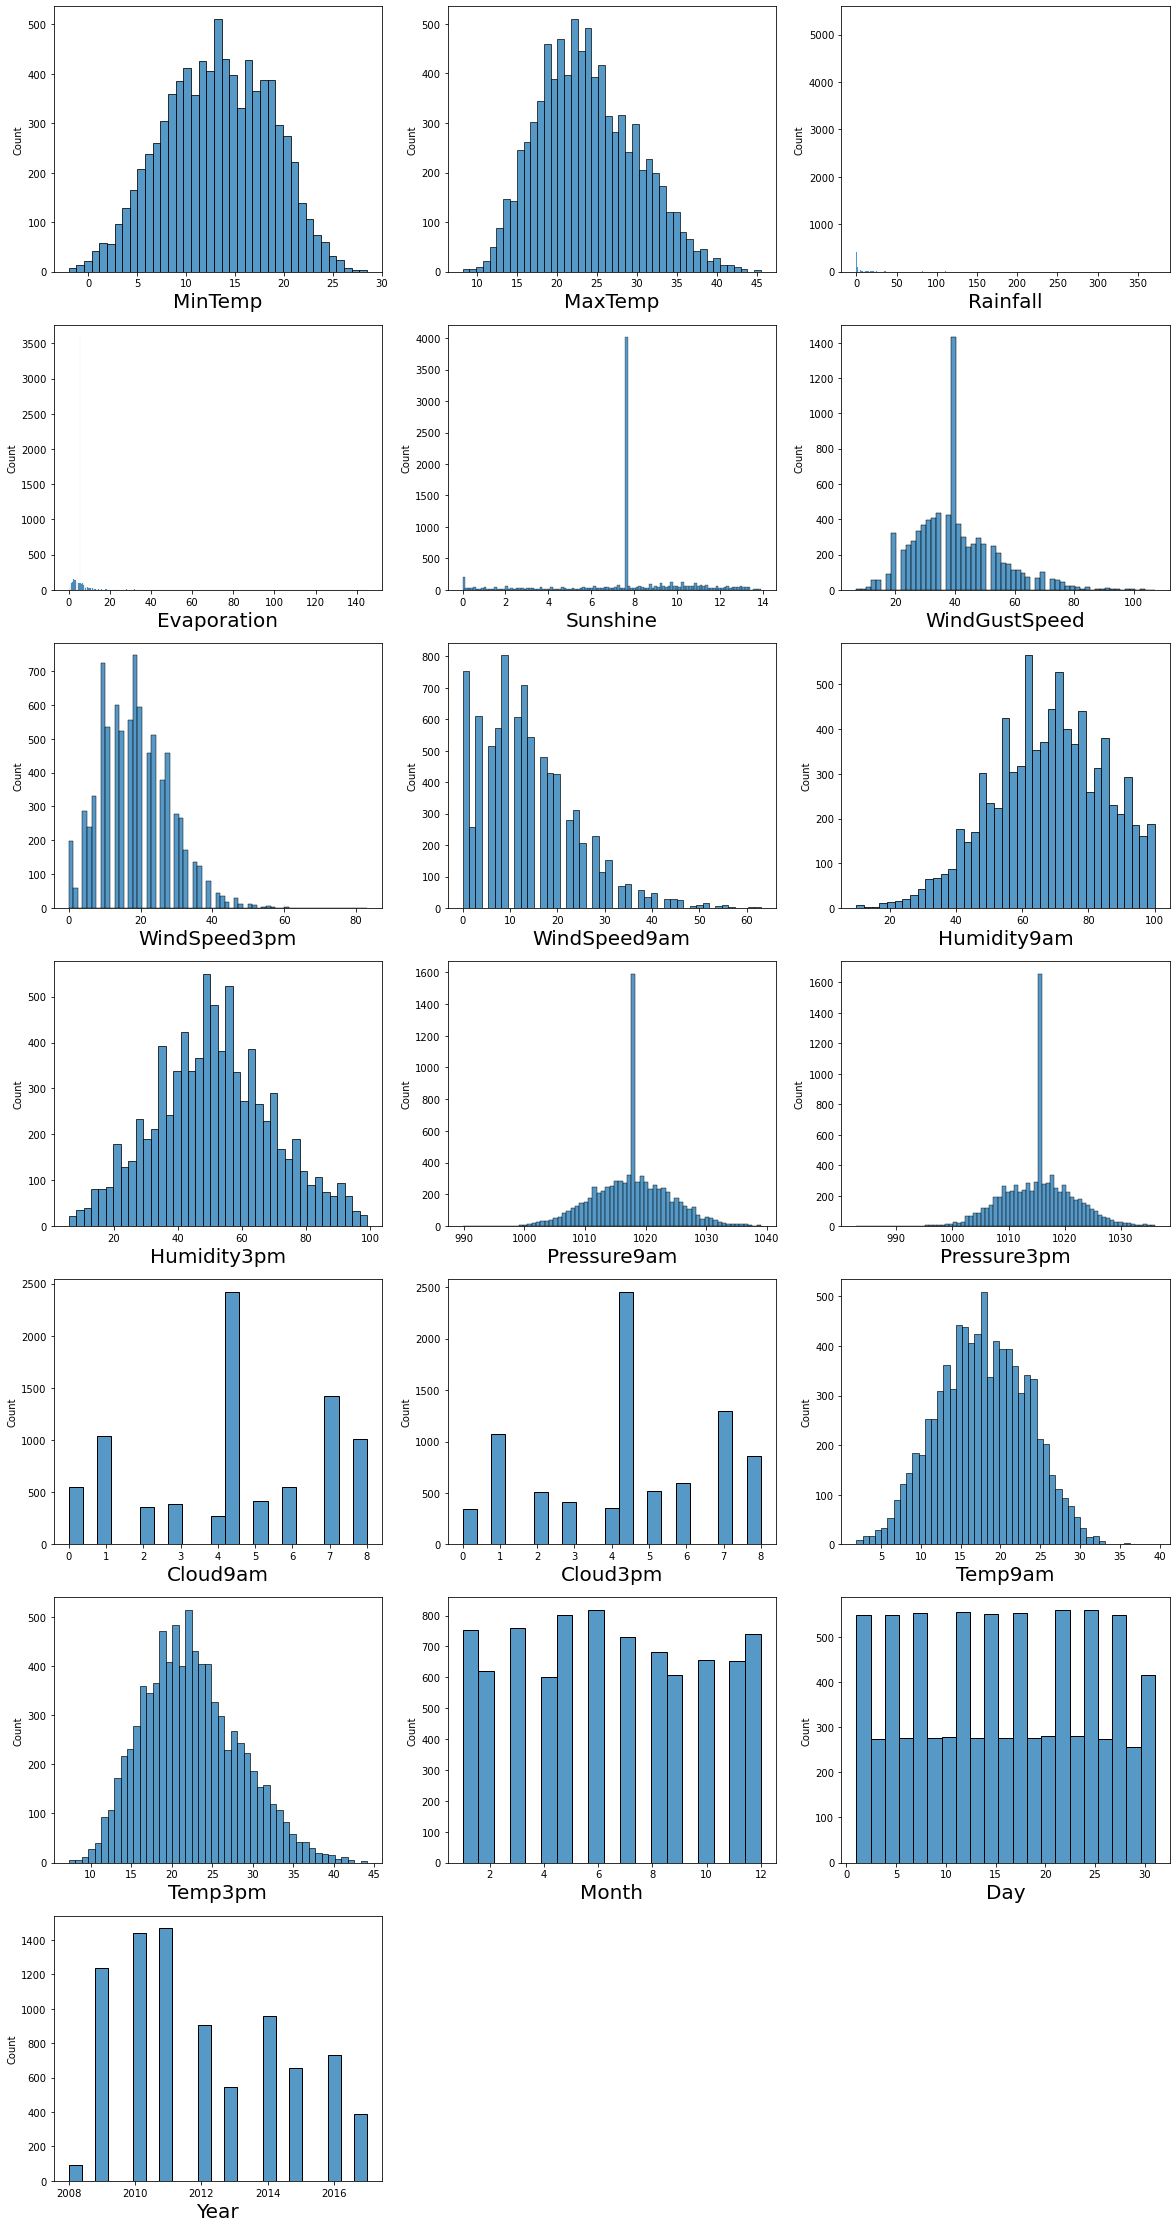

In [43]:
#Checking of histogram each columns having numerical data
plt.figure(figsize=(20,40))
pltno = 1
for columns in numerical:
    if pltno <=20:
        ax = plt.subplot(7,3,pltno)
        sns.histplot(df[columns])
        plt.xlabel(columns, fontsize=20)       
    pltno += 1
plt.show()

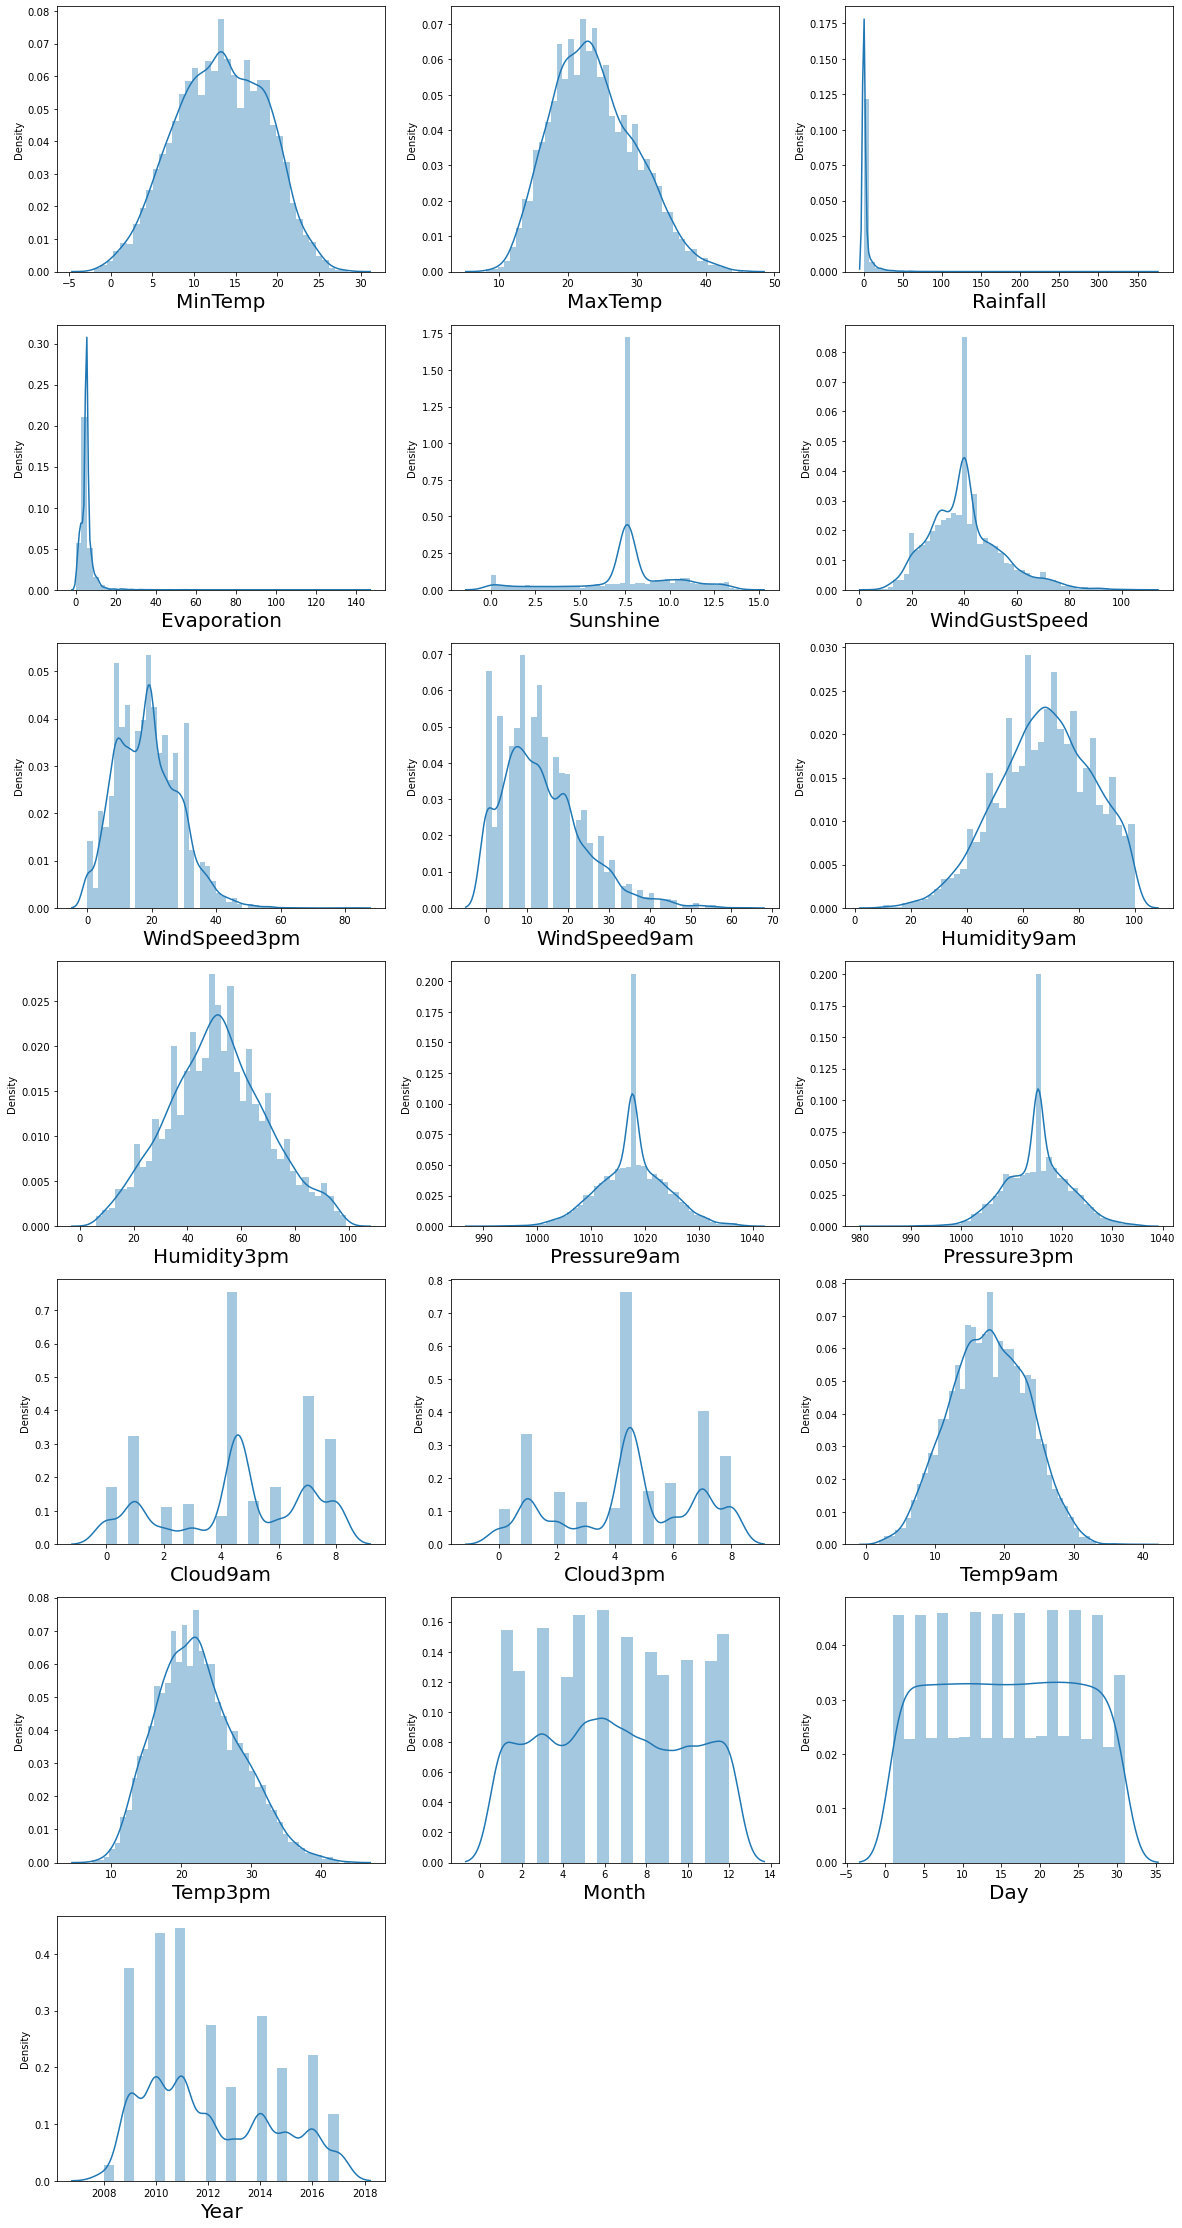

In [44]:
#Checking of distribution plot each columns having numerical data
plt.figure(figsize=(20,40))
pltno = 1
for columns in numerical:
    if pltno <=20:
        ax = plt.subplot(7,3,pltno)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=20)       
    pltno += 1
plt.show()

We can observe that Max temp, Min temp, Humidity at 3 PM, Temp 9AM, Temp 3PM, Pressure 9AM, Pressure 3PM all these data are approximately well numerically distributed with less skewness

Rainfall, evaporation data are highly right skewed

Windgustspeed, Wind speed 3PM, WindSpeed 9AM are little bit right skewed

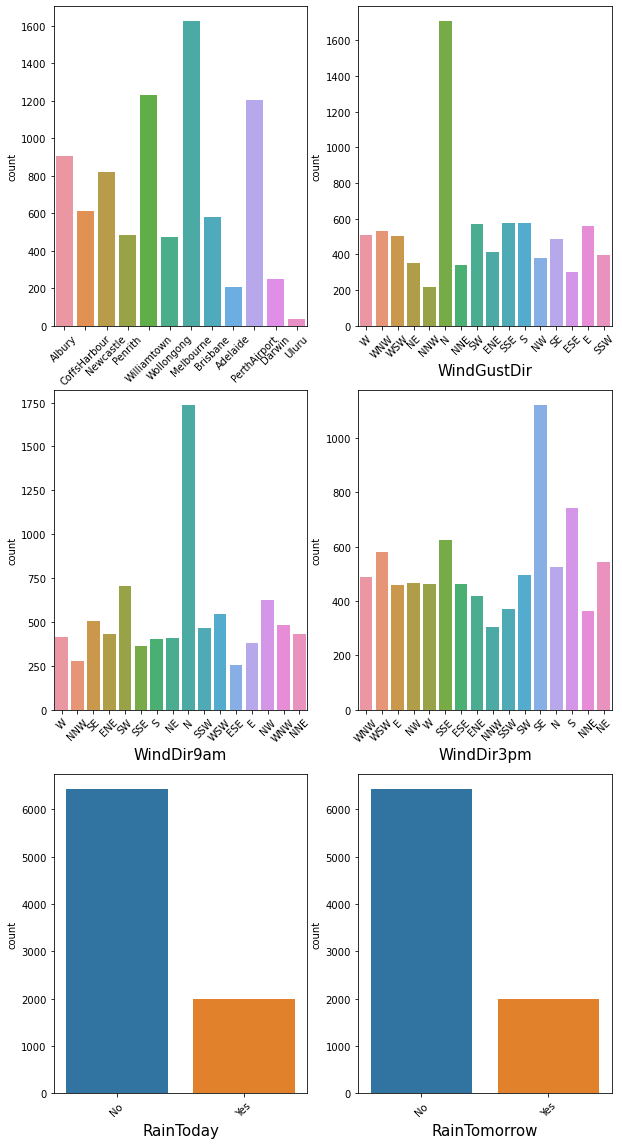

In [47]:
#Categorical
#Checking of value counts in each columns having categorical data
plt.figure(figsize=(10,20))
pltno = 1
for columns in categorical:
    if pltno <=6:
        ax = plt.subplot(3,2,pltno)
        sns.countplot(df[columns])
        plt.xlabel(columns, fontsize=15) 
        plt.xticks(rotation = 45)
    pltno += 1
plt.show()

We can observe that max numer of observation data are available for Melbourne area

Wind gust direction is towards North most of the time

At 9 am direction is towards North majorly

At 3 pm direction is towards South east majorly

Also rain prediction (target) data for today and tomorrow is unbalanced in nature

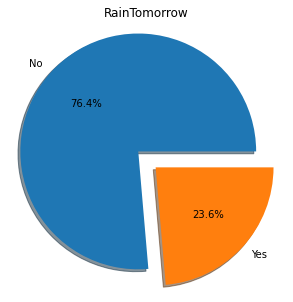

In [48]:
#Checking of value counts in target variable
var = 'RainTomorrow'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= ['No','Yes'], autopct='%1.1f%%', explode=[0.1,0.1], shadow=True)
plt.axis('equal')
plt.title(var)
plt.show()

In [49]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

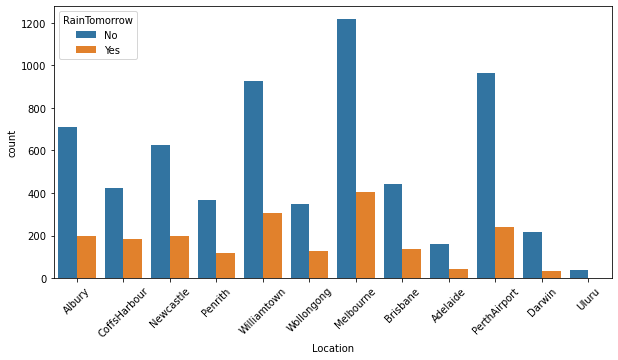

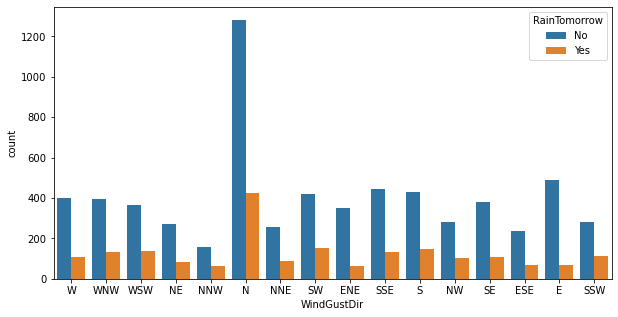

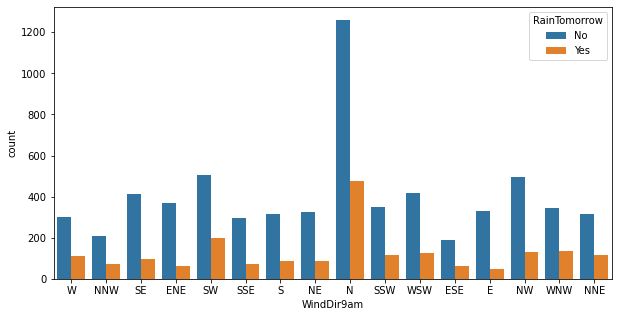

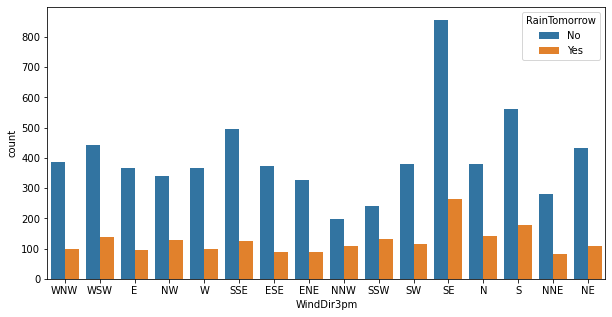

In [53]:
#Rain tomorrow based on location
plt.figure(figsize=(10, 5))
sns.countplot(df['Location'], hue=df['RainTomorrow'])
plt.xticks(rotation = 45)
plt.show()

#Rain tomorrow based on wind direction
plt.figure(figsize=(10, 5))
sns.countplot(df['WindGustDir'], hue=df['RainTomorrow'])
plt.show()

#Rain tomorrow based on wind direction at 9 am
plt.figure(figsize=(10, 5))
sns.countplot(df['WindDir9am'], hue=df['RainTomorrow'])
plt.show()

#Rain tomorrow based on wind direction at 3 pm
plt.figure(figsize=(10, 5))
sns.countplot(df['WindDir3pm'], hue=df['RainTomorrow'])
plt.show()

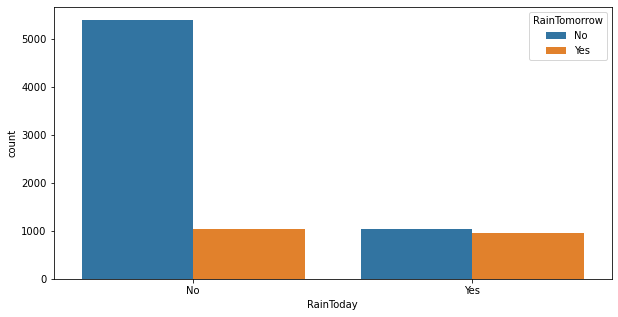

In [54]:
#Rain tomorrow based on rain today
plt.figure(figsize=(10, 5))
sns.countplot(df['RainToday'], hue=df['RainTomorrow'])
plt.show()

There is almost 50% probability of rain tomorrow if it rained today

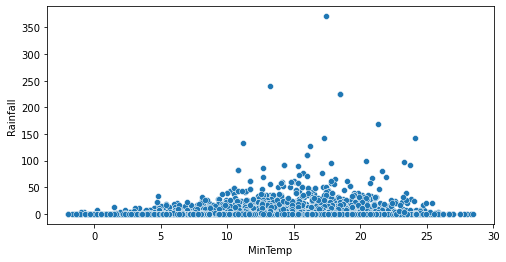

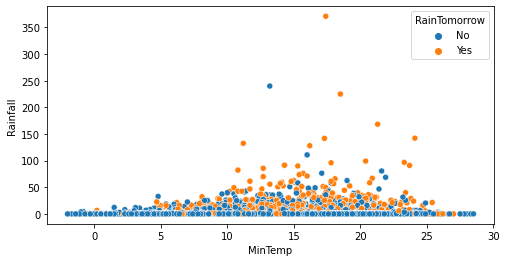

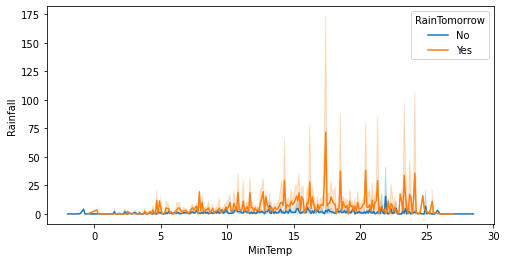

In [58]:
#Vizualization of Min temp vs rainfall
plt.figure(figsize=(8,4))
sns.scatterplot(y = df['Rainfall'], x = df['MinTemp'])
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(y = df['Rainfall'], x = df['MinTemp'], hue = df['RainTomorrow'])
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['MinTemp'], hue = df['RainTomorrow'])
plt.show()

We can observe that chance of raining tomorrow and rainfall amount is more around 10 to 25 min temp

Max rainfall occured at around Min temp 17

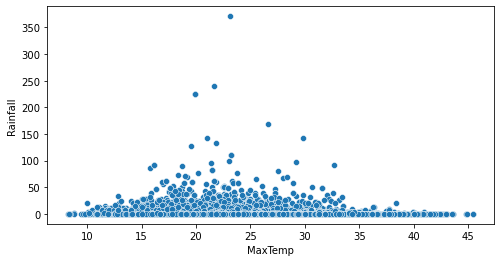

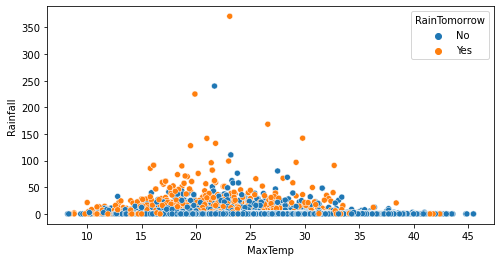

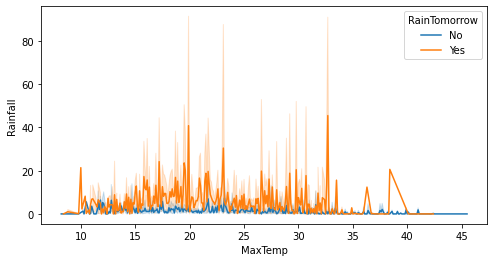

In [59]:
#Vizualization of Max temp vs rainfall
plt.figure(figsize=(8,4))
sns.scatterplot(y = df['Rainfall'], x = df['MaxTemp'])
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(y = df['Rainfall'], x = df['MaxTemp'], hue = df['RainTomorrow'])
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['MaxTemp'], hue = df['RainTomorrow'])
plt.show()

We can observe that chance of raining tomorrow and rainfall amount is more around 12 to 30 Max temp

Max rainfall occured at around Max temp 23

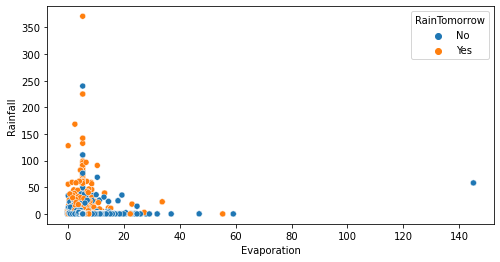

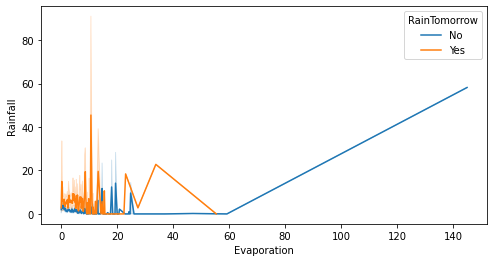

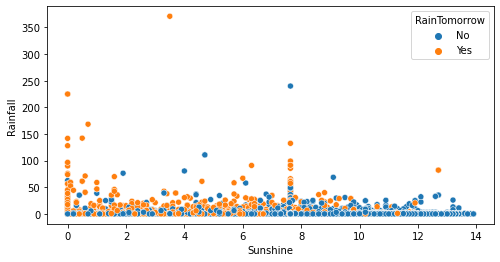

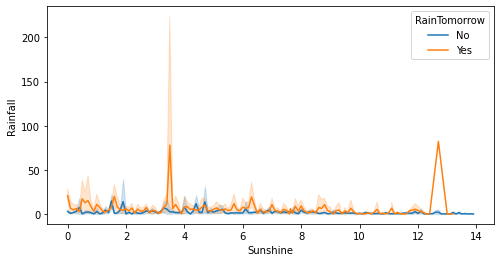

In [60]:
#Vizualization of evaporation vs rainfall
plt.figure(figsize=(8,4))
sns.scatterplot(y = df['Rainfall'], x = df['Evaporation'], hue = df['RainTomorrow'])
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['Evaporation'], hue = df['RainTomorrow'])
plt.show()

#Vizualization of sunshine vs rainfall
plt.figure(figsize=(8,4))
sns.scatterplot(y = df['Rainfall'], x = df['Sunshine'], hue = df['RainTomorrow'])
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['Sunshine'], hue = df['RainTomorrow'])
plt.show()

We can observe that more rainfall at lesser values of evaporation and sunshine between 0 to 6

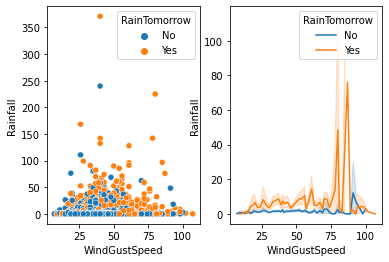

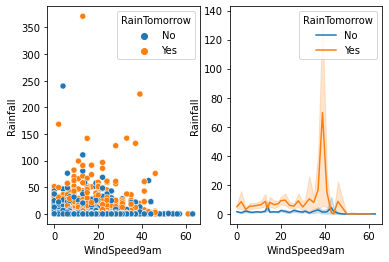

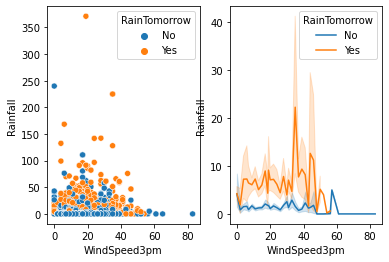

In [70]:
#Vizualization of windspeed vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['WindGustSpeed'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['WindGustSpeed'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of windspeed at 9 am vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['WindSpeed9am'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['WindSpeed9am'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of windspeed at 3pm vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['WindSpeed3pm'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['WindSpeed3pm'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

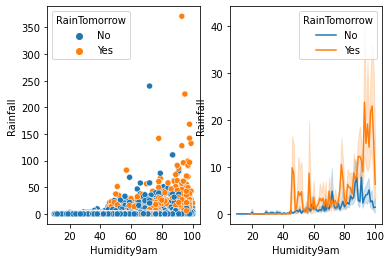

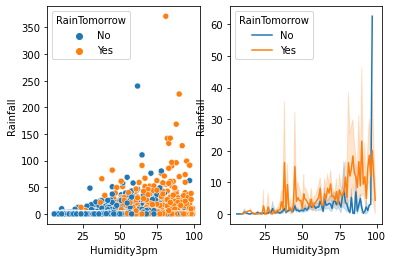

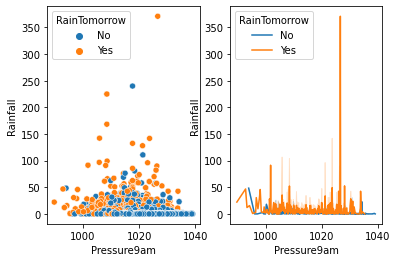

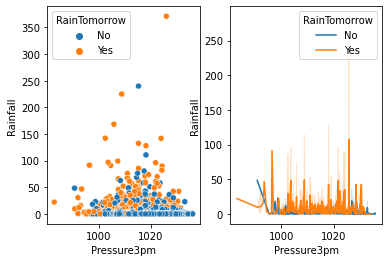

In [71]:
#Vizualization of Humidity9am vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Humidity9am'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Humidity9am'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of Humidity3pm vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Humidity3pm'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Humidity3pm'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of Pressure9am vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Pressure9am'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Pressure9am'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of Pressure3pm vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Pressure3pm'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Pressure3pm'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

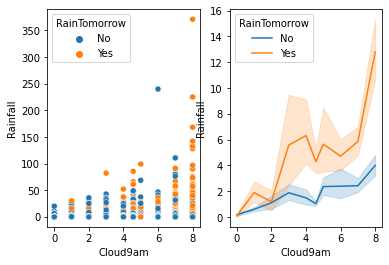

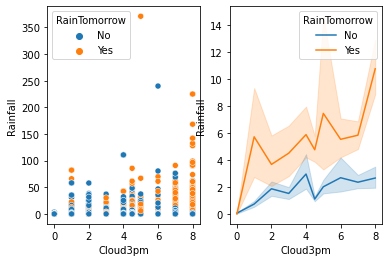

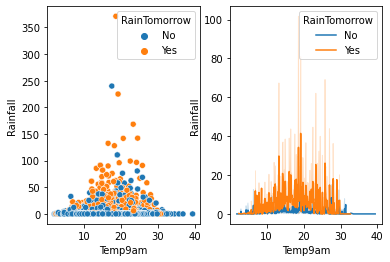

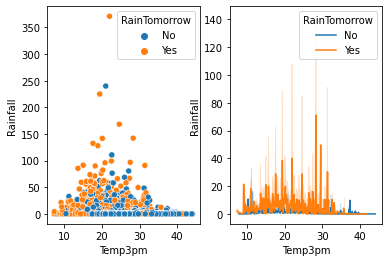

In [72]:
#Vizualization of Cloud9am vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Cloud9am'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Cloud9am'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of Cloud3pm vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Cloud3pm'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Cloud3pm'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of Temp9am vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Temp9am'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Temp9am'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

#Vizualization of Temp3pm vs rainfall
fig, axs = plt.subplots(1,2)
sns.scatterplot(y = df['Rainfall'], x = df['Temp3pm'], hue = df['RainTomorrow'], ax=axs[0])
sns.lineplot(y = df['Rainfall'], x = df['Temp3pm'], hue = df['RainTomorrow'], ax=axs[1])
plt.show()

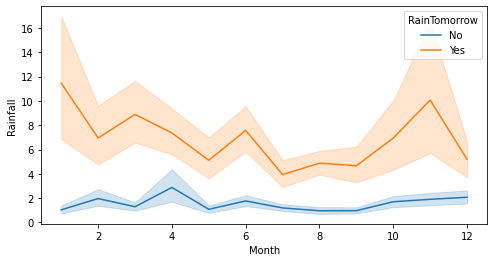

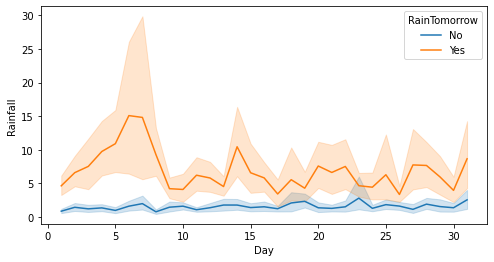

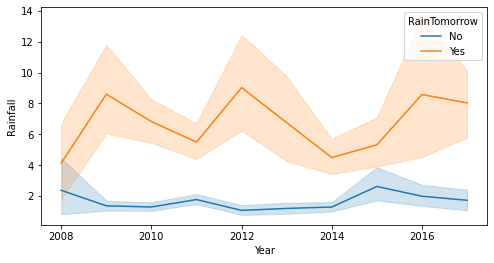

In [76]:
#Vizualization of rainfall vs different months of year, different years and different days of a month
plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['Month'], hue = df['RainTomorrow'])
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['Day'], hue = df['RainTomorrow'])
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(y = df['Rainfall'], x = df['Year'], hue = df['RainTomorrow'])
plt.show()

In [77]:
#Encoding the target data
df['RainTomorrow'] = df['RainTomorrow'].replace({"Yes":1, "No":0 })

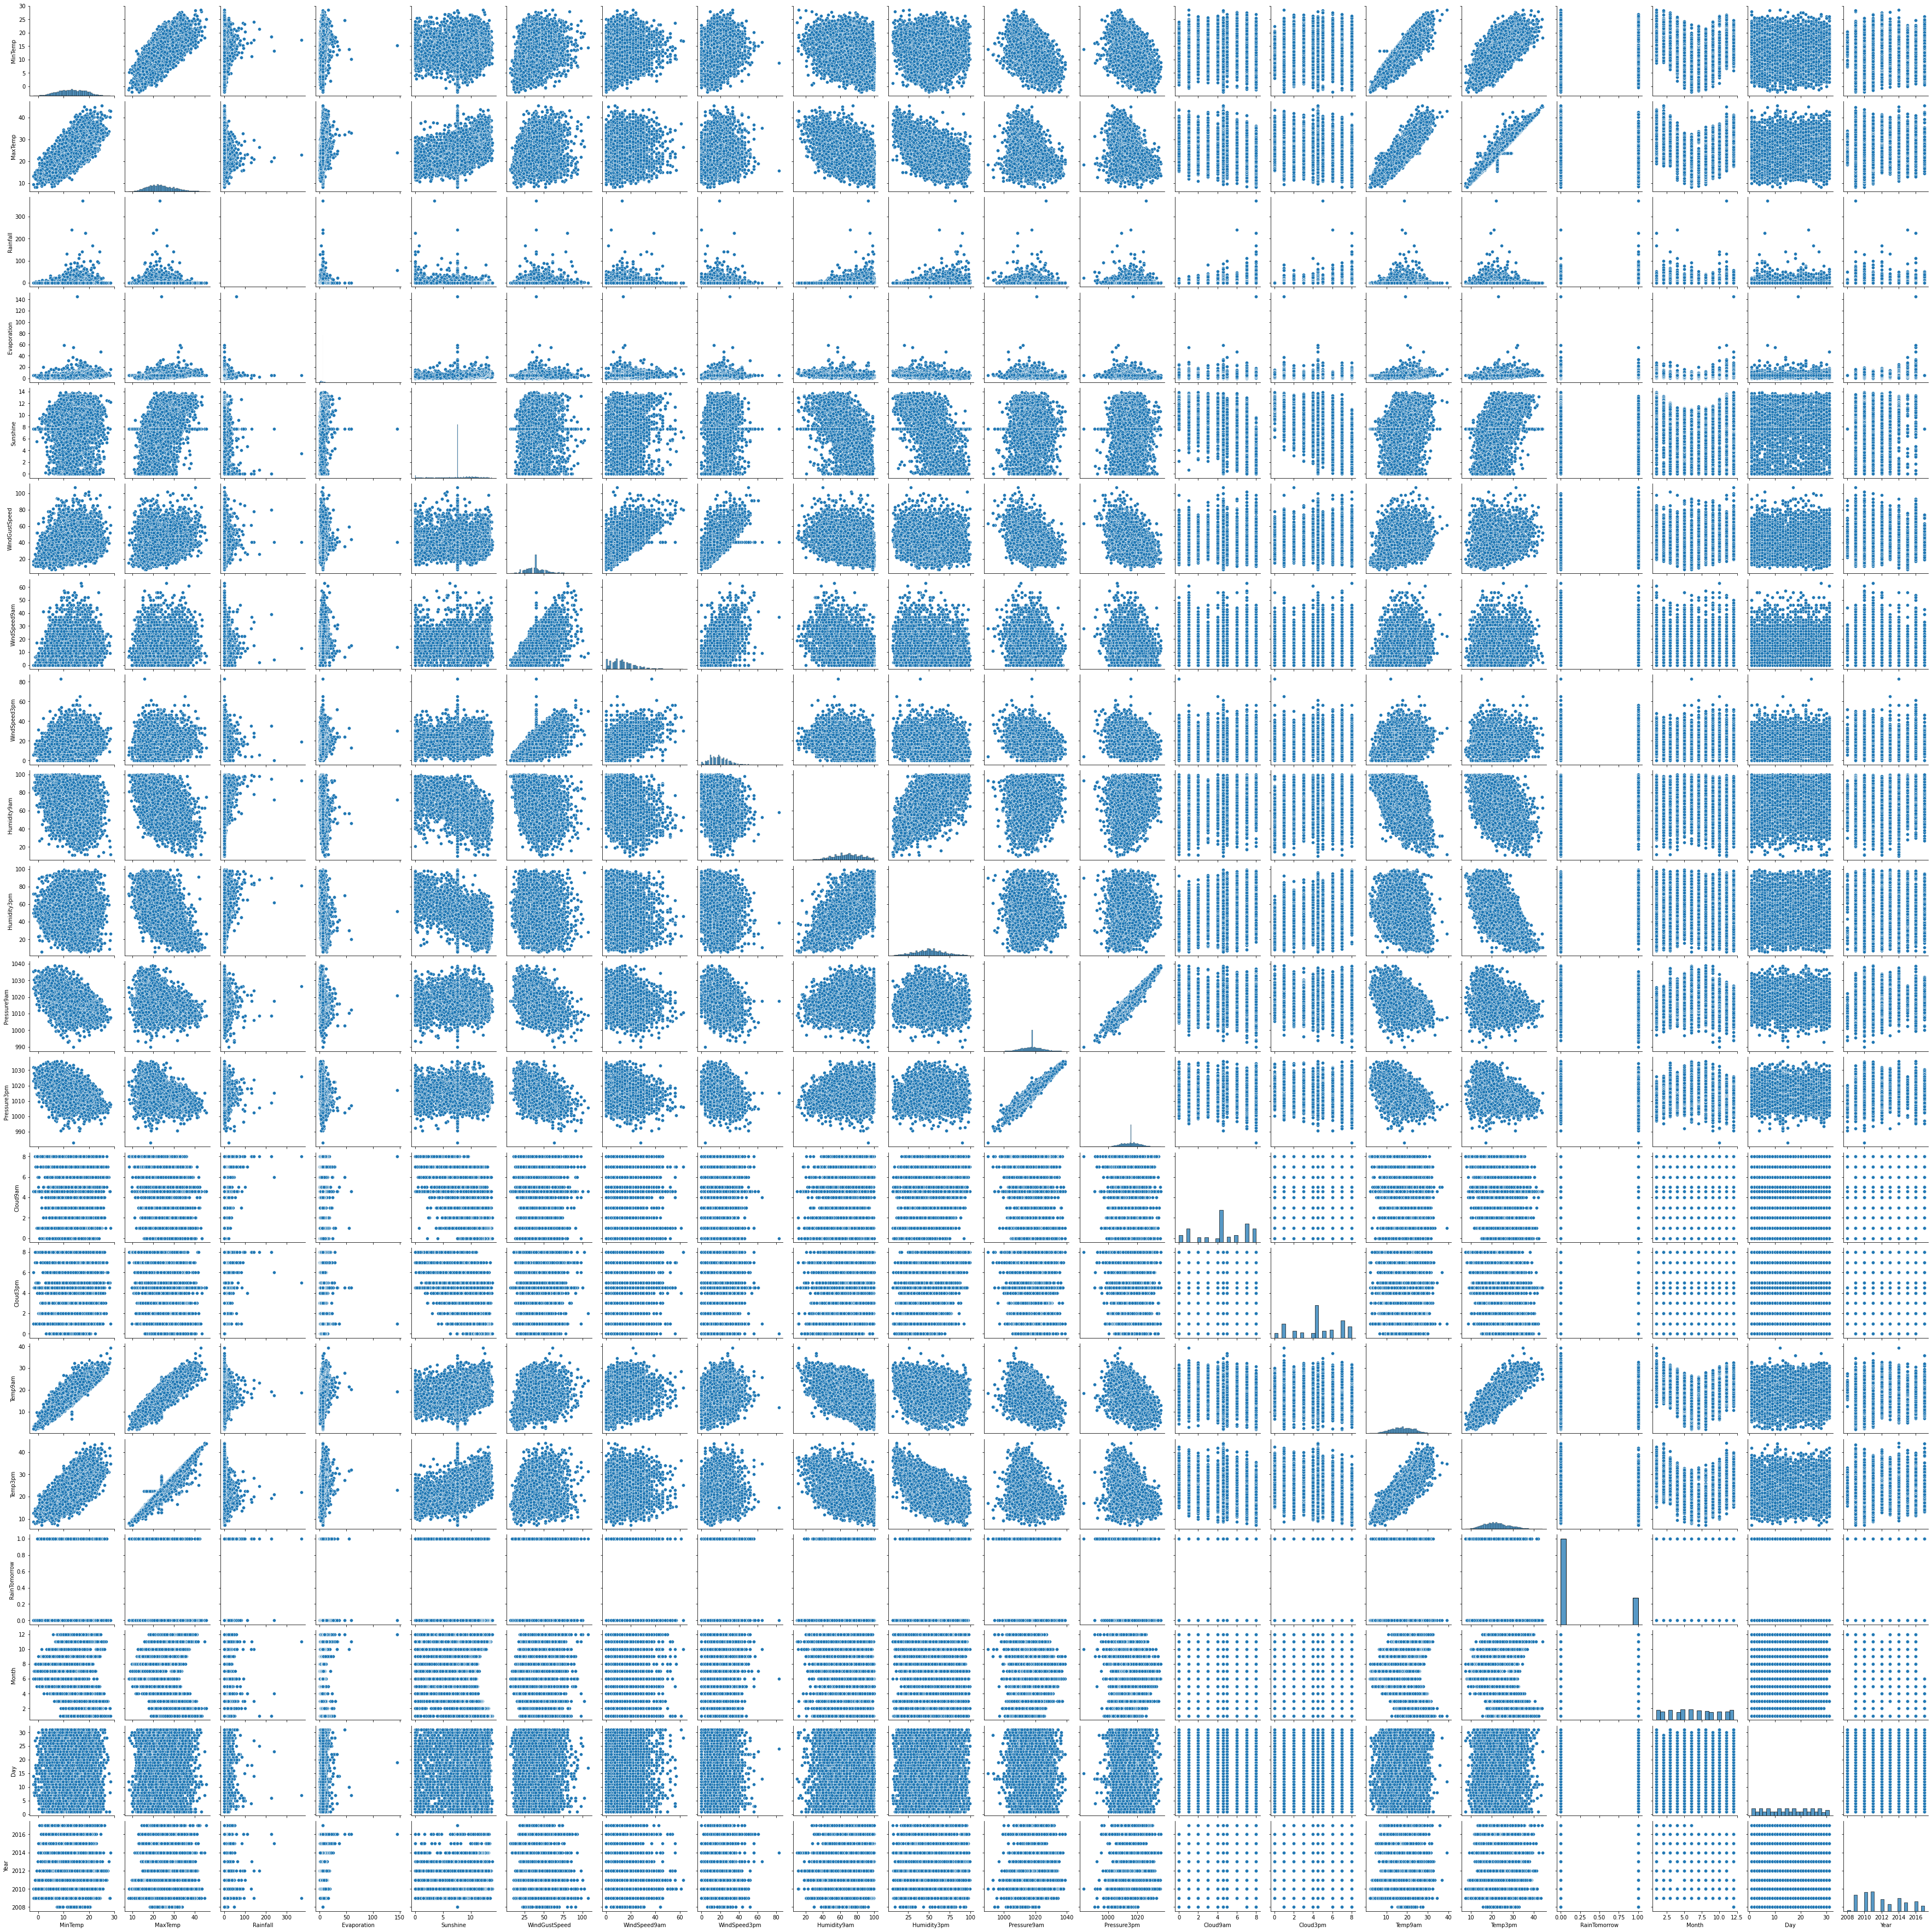

In [78]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

We can observe many input features has correlation among each other

In [79]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month',
 'Day',
 'Year']

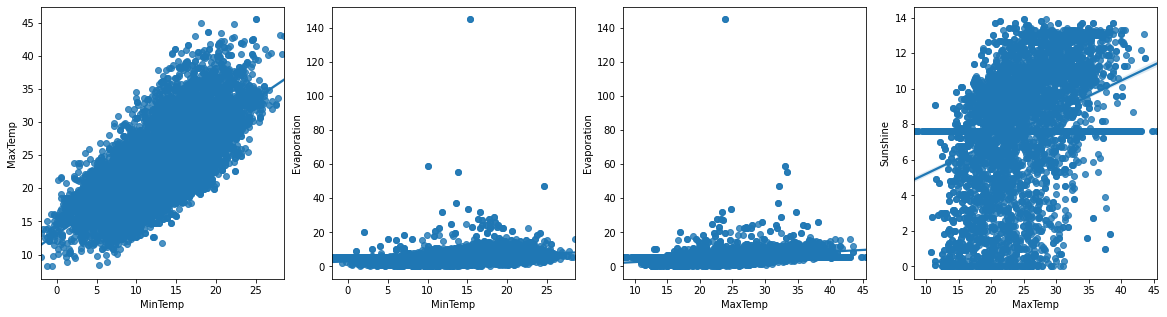

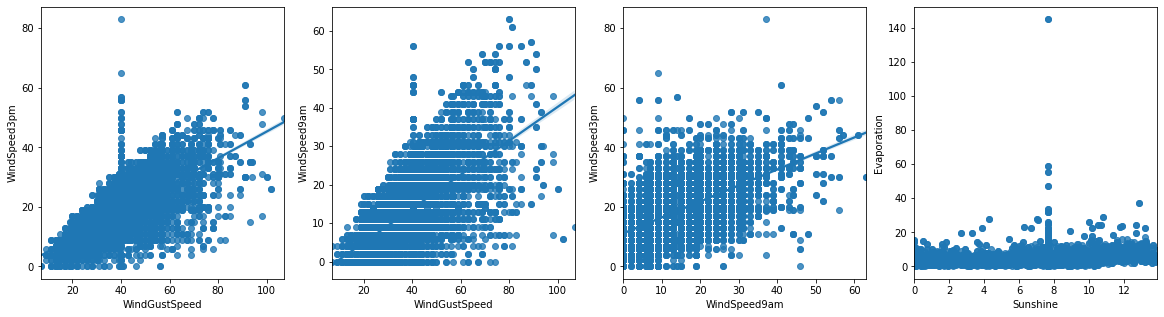

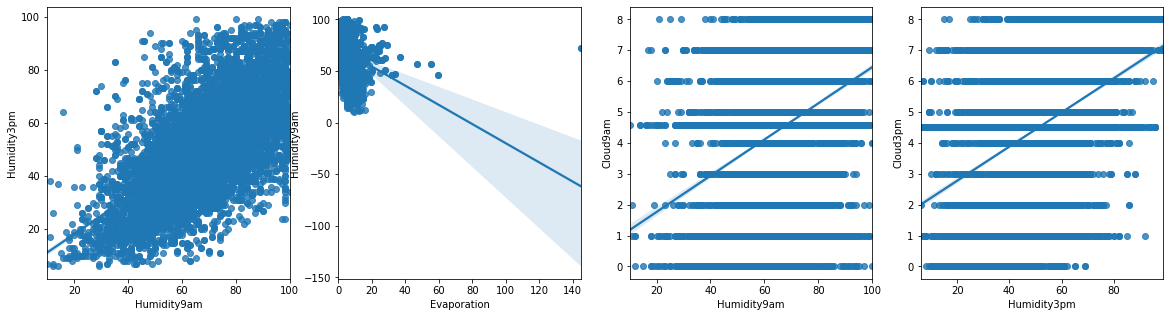

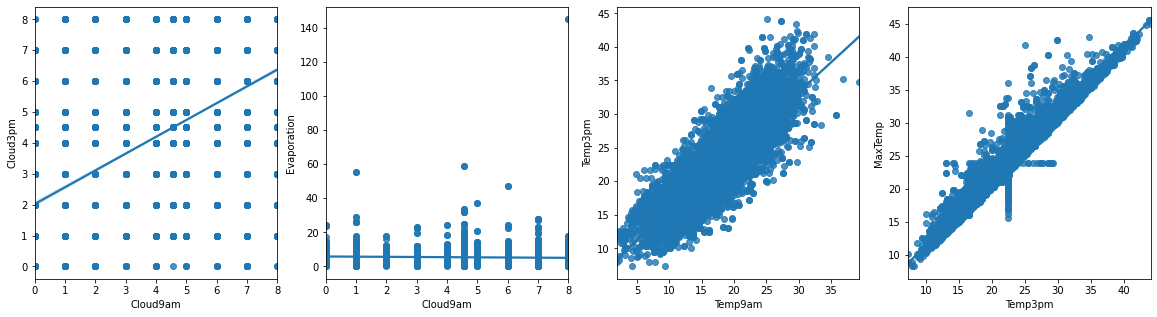

In [88]:
#Let us vizualize inter correlation (multicollinearity) among these input feature columns
plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['MinTemp'], y = df['MaxTemp'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['MinTemp'], y = df['Evaporation'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['MaxTemp'], y = df['Evaporation'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['MaxTemp'], y = df['Sunshine'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['WindGustSpeed'], y = df['WindSpeed3pm'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['WindGustSpeed'], y = df['WindSpeed9am'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['WindSpeed9am'], y = df['WindSpeed3pm'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['Sunshine'], y = df['Evaporation'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['Humidity9am'], y = df['Humidity3pm'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['Evaporation'], y = df['Humidity9am'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['Humidity9am'], y = df['Cloud9am'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['Humidity3pm'], y = df['Cloud3pm'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['Cloud9am'], y = df['Cloud3pm'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['Cloud9am'], y = df['Evaporation'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['Temp9am'], y = df['Temp3pm'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['Temp3pm'], y = df['MaxTemp'])
plt.show()

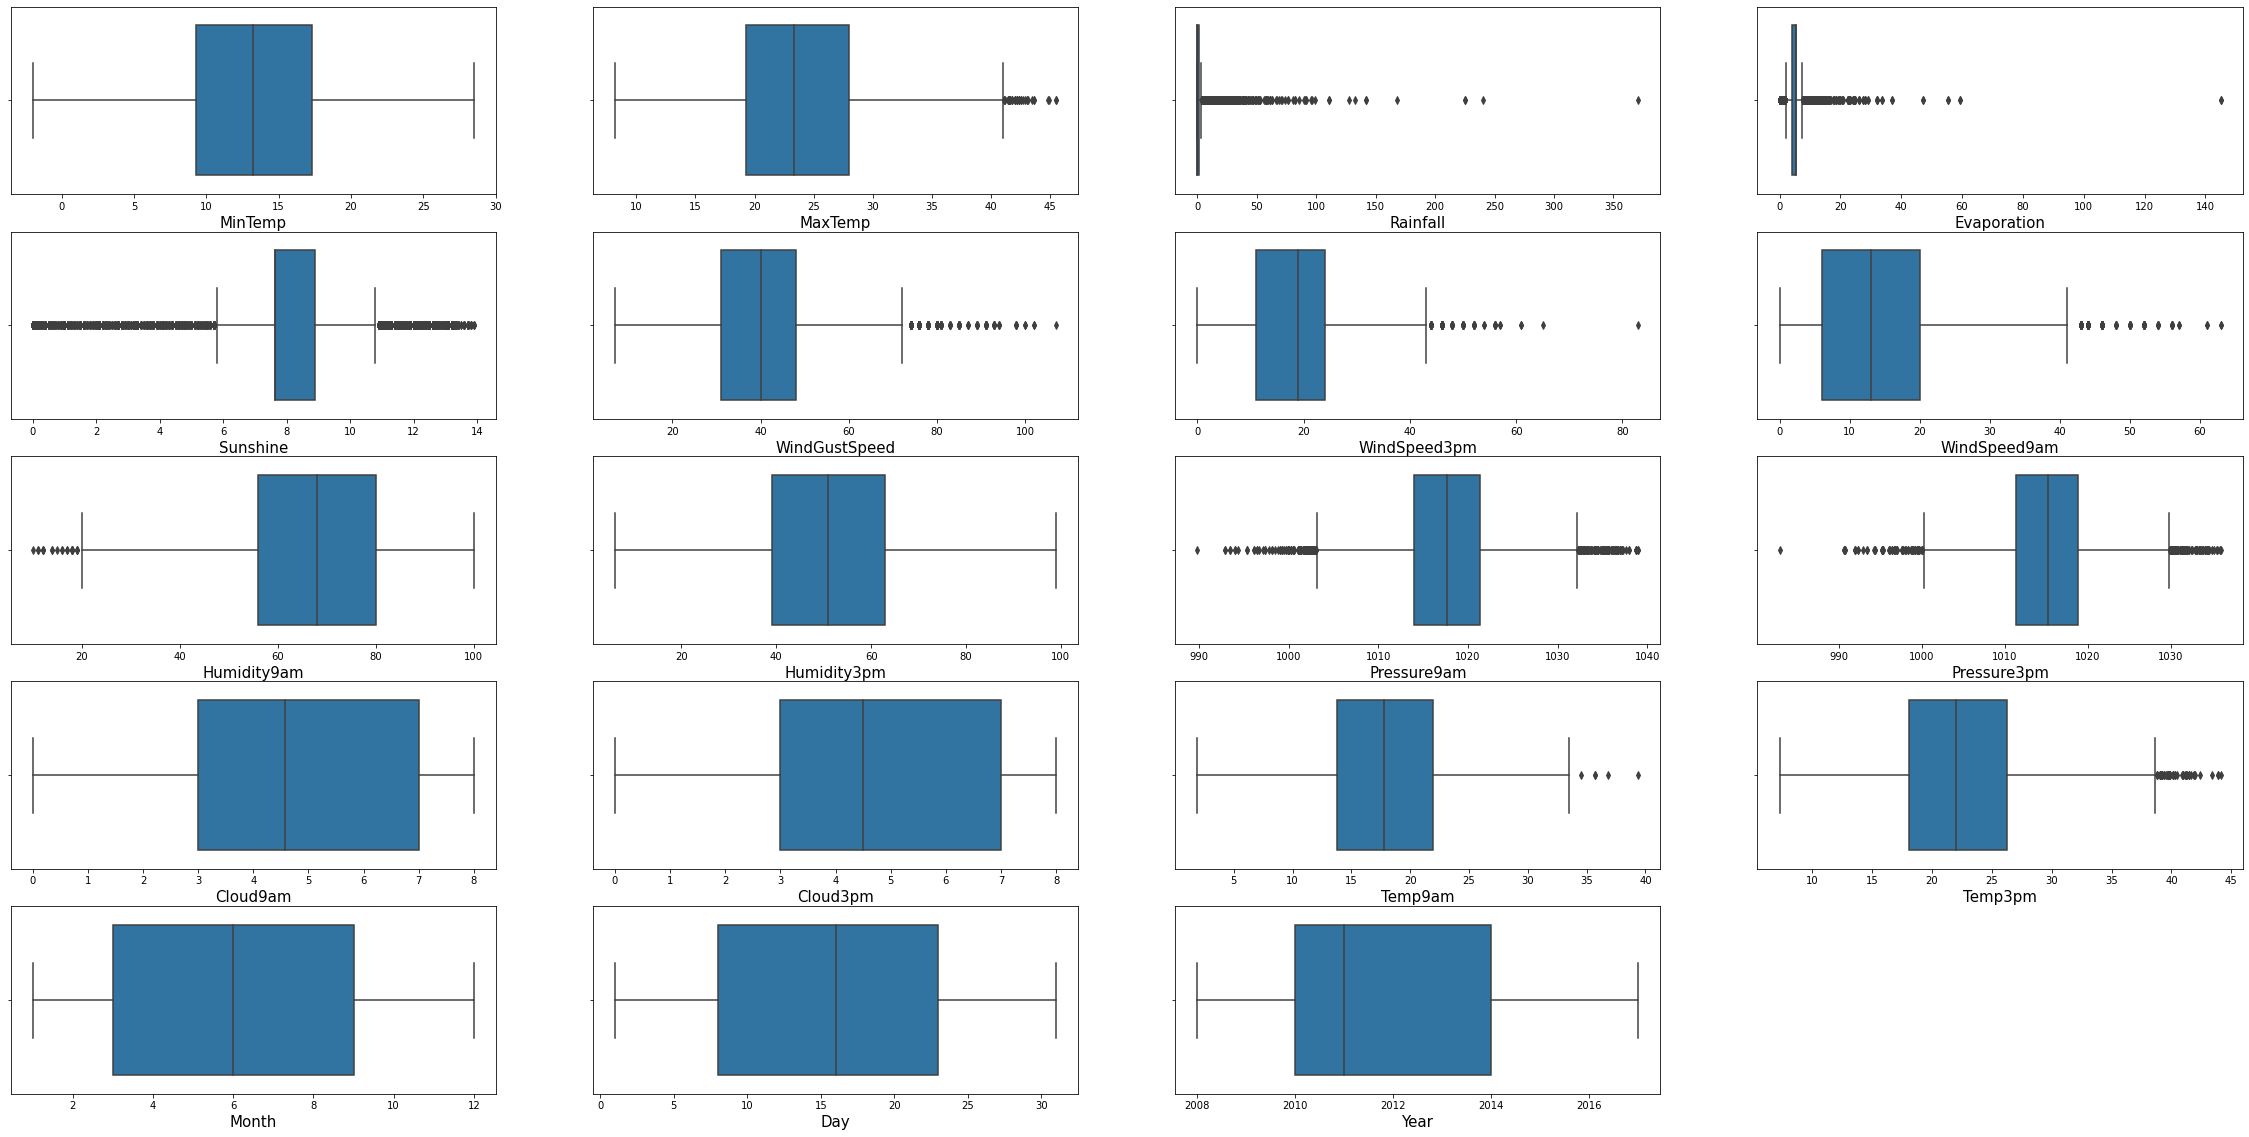

In [94]:
#Outliers/noise checking for input numerical feature columns
plt.figure(figsize=(40,20))
pltno = 1
for columns in numerical:
    if pltno <=20:
        ax = plt.subplot(5,4,pltno)
        sns.boxplot(x = df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

The outliers must be handled before training the model

In [95]:
#Statistical summary of the data
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  RainTomorrow        Month          Day         Year  
count  8425.000000   8425.000000  8425.000000  8425.000000  8425.000000  
mean     22.442934      0.236320     6.442136    15.741958  2012.102433  
std       5.945849      0.424846     3.437994     8.787354     2.473137  
min       7.300000      0.000000     1.000000     1.000000  2008.000000  
25%      18.100000      0.000000     3.000000     8.000000  2010.000000  
50%      22.000000      0.000000     6.000000    16.000000  2011.000000  
75%      26.300000      0.000000     9.000000    23.000000  2014.000000  
max      44.100000      1.000000    12.000000    31.000000  2017.000000

In [96]:
#Coefficient of correlation matrix
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.717522  0.087684     0.254965  0.056184   
MaxTemp        0.717522  1.000000 -0.087451     0.322405  0.378403   
Rainfall       0.087684 -0.087451  1.000000     0.023517 -0.169432   
Evaporation    0.254965  0.322405  0.023517     1.000000  0.226001   
Sunshine       0.056184  0.378403 -0.169432     0.226001  1.000000   
WindGustSpeed  0.230058  0.139998  0.086000     0.136371 -0.013778   
WindSpeed9am   0.136872  0.013314  0.050631     0.104294 -0.018069   
WindSpeed3pm   0.178349  0.088172  0.024791     0.101126  0.030145   
Humidity9am   -0.130731 -0.390976  0.228800    -0.213108 -0.360831   
Humidity3pm    0.079048 -0.421879  0.235444    -0.161661 -0.440268   
Pressure9am   -0.429432 -0.325721 -0.072668    -0.177786  0.021887   
Pressure3pm   -0.422991 -0.403258 -0.033649    -0.189558 -0.035863   
Cloud9am       0.091604 -0.253968  0.185444    -0.062283 -0.533391   
Cloud3pm       0.038414 -0.250132  0.150760    -0.108022 -0.547304   
Temp9am        0.887119  0.866039 -0.007083     0.305264  0.250640   
Temp3pm        0.685520  0.974506 -0.090687     0.315109  0.395324   
RainTomorrow   0.092942 -0.152886  0.220021    -0.059012 -0.327731   
Month         -0.245854 -0.163253 -0.012244     0.004362 -0.006694   
Day            0.009446  0.015608 -0.013760     0.013597  0.004662   
Year           0.044123  0.119772  0.006435     0.152708  0.065374   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.230058      0.136872      0.178349    -0.130731   
MaxTemp             0.139998      0.013314      0.088172    -0.390976   
Rainfall            0.086000      0.050631      0.024791     0.228800   
Evaporation         0.136371      0.104294      0.101126    -0.213108   
Sunshine           -0.013778     -0.018069      0.030145    -0.360831   
WindGustSpeed       1.000000      0.600198      0.634939    -0.269593   
WindSpeed9am        0.600198      1.000000      0.560660    -0.358391   
WindSpeed3pm        0.634939      0.560660      1.000000    -0.250953   
Humidity9am        -0.269593     -0.358391     -0.250953     1.000000   
Humidity3pm        -0.091860     -0.110587     -0.091004     0.633291   
Pressure9am        -0.407139     -0.174679     -0.251697     0.142374   
Pressure3pm        -0.372651     -0.138454     -0.207544     0.173415   
Cloud9am            0.023313     -0.000549      0.005061     0.404742   
Cloud3pm            0.078631      0.058198      0.003295     0.296862   
Temp9am             0.202298      0.109798      0.184188    -0.378344   
Temp3pm             0.102199     -0.002606      0.066087    -0.382401   
RainTomorrow        0.190127      0.068285      0.053568     0.271222   
Month               0.051968      0.038427      0.049483    -0.115530   
Day                -0.002876     -0.003067     -0.008957     0.003799   
Year               -0.042402     -0.088489     -0.051466     0.099717   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079048    -0.429432    -0.422991  0.091604  0.038414   
MaxTemp          -0.421879    -0.325721    -0.403258 -0.253968 -0.250132   
Rainfall          0.235444    -0.072668    -0.033649  0.185444  0.150760   
Evaporation      -0.161661    -0.177786    -0.189558 -0.062283 -0.108022   
Sunshine         -0.440268     0.021887    -0.035863 -0.533391 -0.547304   
WindGustSpeed    -0.091860    -0.407139    -0.372651  0.023313  0.078631   
WindSpeed9am     -0.110587    -0.174679    -0.138454 -0.000549  0.058198   
WindSpeed3pm     -0.091004    -0.251697    -0.207544  0.005061  0.003295   
Humidity9am       0.633291     0.142374     0.173415  0.404742  0.296862   
Humidity3pm       1.000000     0.001629     0.070369  0.424348  0.439965   
Pressure9am       0.001629     1.000000     0.961428 -0.070820 -0.082645   
Pressure3pm       0.070369     0.961428     1.000000 -0.012409 -0.028748   
Cloud9am          0.424

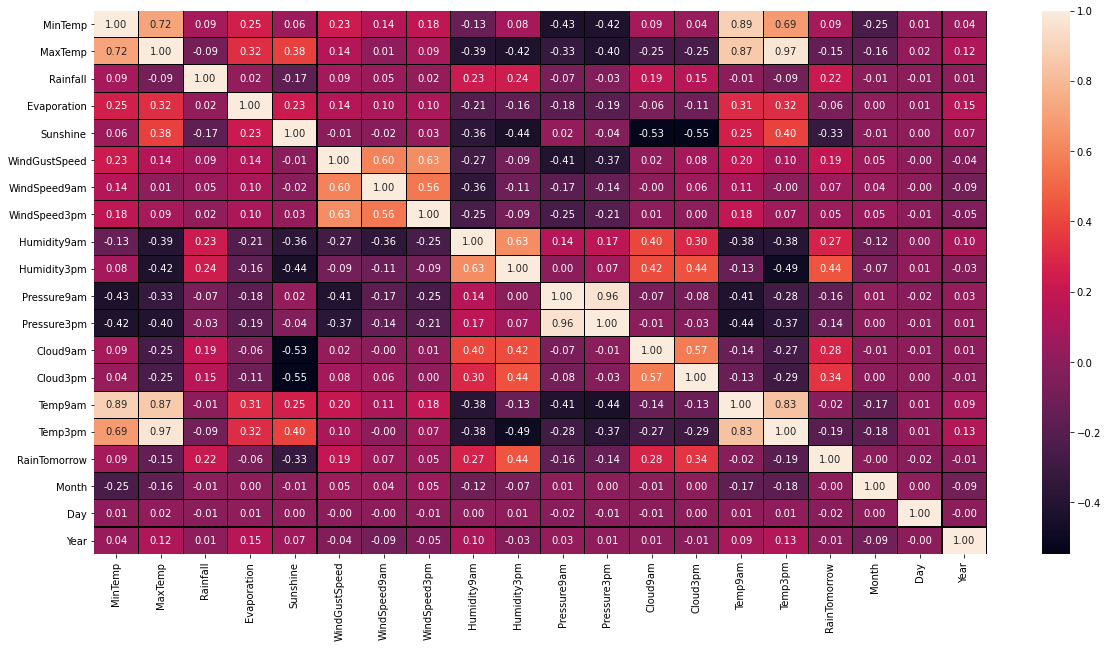

In [97]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

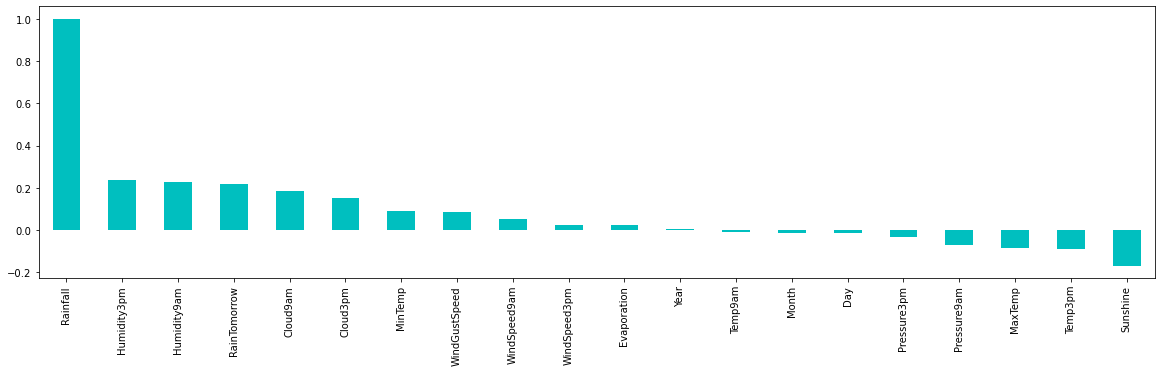

Rainfall         1.000000
Humidity3pm      0.235444
Humidity9am      0.228800
RainTomorrow     0.220021
Cloud9am         0.185444
Cloud3pm         0.150760
MinTemp          0.087684
WindGustSpeed    0.086000
WindSpeed9am     0.050631
WindSpeed3pm     0.024791
Evaporation      0.023517
Year             0.006435
Temp9am         -0.007083
Month           -0.012244
Day             -0.013760
Pressure3pm     -0.033649
Pressure9am     -0.072668
MaxTemp         -0.087451
Temp3pm         -0.090687
Sunshine        -0.169432
Name: Rainfall, dtype: float64

In [98]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['Rainfall'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['Rainfall'].sort_values(ascending=False)

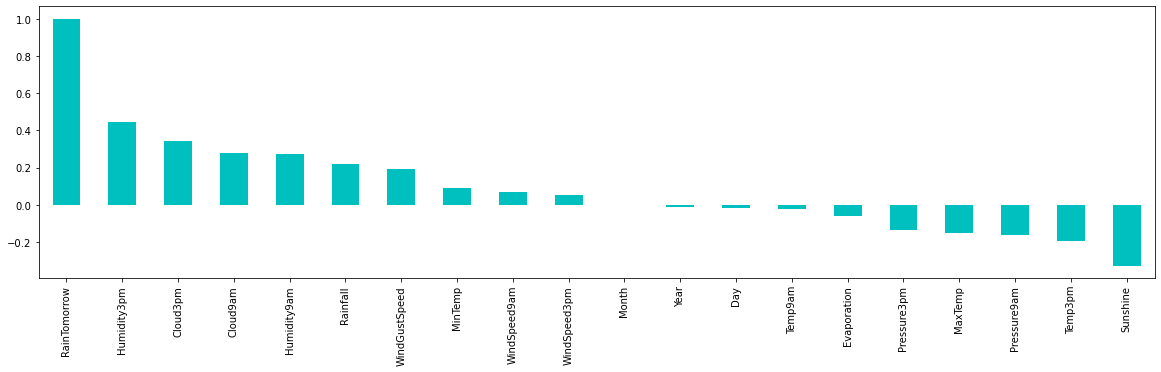

RainTomorrow     1.000000
Humidity3pm      0.444808
Cloud3pm         0.344369
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
Month           -0.001243
Year            -0.011066
Day             -0.015461
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
MaxTemp         -0.152886
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64

In [99]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['RainTomorrow'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['RainTomorrow'].sort_values(ascending=False)

In [100]:
#Encoding the categorical/text type data into numerical form
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in categorical:
    df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
    
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1  8.000000   
1           44.0           6          15  ...       1007.8  4.566622   
2           46.0          13          15  ...       1008.7  4.566622   
3           24.0           9           0  ...       1012.8  4.566622   
4           41.0           1           7  ...       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Month  Day  Year  
0  4.503183     16.9     21.8          0             0     12    1  2008  
1  4.503183     17.2     24.3          0             0     12    2  2008  
2  2.000000     21.0     23.2          0             0     12    3  2008  
3  4.503183     18.1     26.5          0             0     12    4  2008  
4  8.000000     17.8     29.7          0             0     12    5  2008  

[5 rows x 25 columns]

In [101]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df[numerical]))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (8425, 25)
Shape after (7987, 25)
5.198813056379822 % loss of data


## RainTomorrow prediction (classification approach)

In [124]:
#Seperate feature and target columns
x = df_new.drop('RainTomorrow', axis=1)
y = df_new['RainTomorrow']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (7987, 24)
y shape (7987,)


In [125]:
x[numerical].skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed3pm     0.300109
WindSpeed9am     0.711395
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Month            0.054460
Day              0.002731
Year             0.430100
dtype: float64

Some of columns Skewness is not within limit of <0.55

In [126]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in numerical:
    if x.skew().loc[col]>0.55:
        x[col] = po.fit_transform(x[col].values.reshape(-1,1))

In [127]:
#We need to scale the data before applying PCA technique to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)

In [128]:
#VIF method to check multicollinearity 
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif

[5.068501988208306,
 60.30070963641064,
 439.98177261472557,
 4.809090781690623,
 1.5619127160980628,
 16.685896509727513,
 5.363913928118354,
 23.384212596122396,
 4.777525211535534,
 6.11947684734752,
 1.9778723364518374,
 9.619370561831973,
 70.87920038378417,
 48.48008666483684,
 580770.0141805117,
 560250.5229774726,
 8.648542134553553,
 8.64626111981611,
 192.84395169012217,
 522.5302606434595,
 5.638065084655958,
 5.2713210531641845,
 4.206760624608423,
 44959.831880103586]

VIF value is greater than 5 many features, high degree of multicollinearity exists

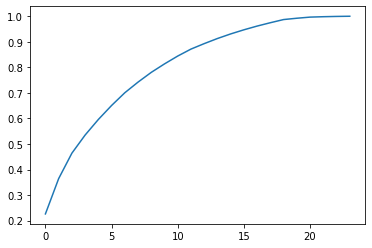

In [129]:
#PCA technique to handle multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_new)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

Curve is saturating at n=17

In [130]:
pca = PCA(n_components=17)
new = pca.fit_transform(x_new)
PC = pd.DataFrame(new, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
x = PC

#Again checing VIF values
vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print('VIF = ',vif,'\n')

VIF =  [1.0000000000000013, 1.0000000000000009, 0.9999999999999996, 1.0000000000000007, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 1.0000000000000007, 1.000000000000002, 1.0000000000000004, 0.9999999999999998, 1.0, 0.9999999999999991, 0.9999999999999996, 1.0000000000000004, 1.0] 



VIF is <5, hence issue of multicollinearity resolved

In [131]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(1.0) #Up sampling to 1:1 ratio of target variable
x1, y1 = smt.fit_resample(x, y)

print('Before', Counter(y))
print('After', Counter(y1))

Before Counter({0: 6165, 1: 1822})
After Counter({0: 6165, 1: 6165})


In [132]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,200):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.8341677096370463
At Max RS 4 Max Accuracy = 0.8404255319148937
At Max RS 14 Max Accuracy = 0.8423028785982478
At Max RS 155 Max Accuracy = 0.8435544430538173
At Max RS 163 Max Accuracy = 0.8466833541927409


In [133]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [134]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=163,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.50%
Accuracy score of test is : 84.67% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1248
           1       0.73      0.48      0.58       350

    accuracy                           0.85      1598
   macro avg       0.80      0.71      0.74      1598
weighted avg       0.84      0.85      0.83      1598



In [135]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8466833541927409
CV score at 2 = 0.7891609515450235
CV score at 3 = 0.8090628746758197
CV score at 4 = 0.8088181244813112
CV score at 5 = 0.8145718309439711
CV score at 6 = 0.8131920425308854
CV score at 7 = 0.8140728684111682
CV score at 8 = 0.8169490883669239
CV score at 9 = 0.8199597568255967
CV score at 10 = 0.8193393370786165

Least difference of CV score and F1 score of testing is : 0.026723597367144136


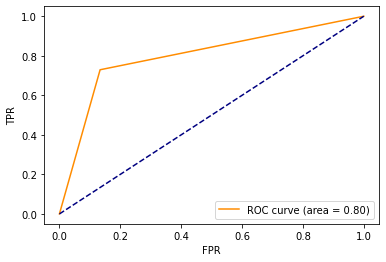

Confusion matrix:
 [[1159  210]
 [ 202   27]] 

Area under curve = 0.7977917135830508


Algorithm name  Accuracy f1 score test  CV score  F1-CV score diff  \
0  Logistic regression                0.846683   0.81996          0.026724   

   Area under curve  
0          0.797792

In [138]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(ypr,predyt),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff',"Area under curve"])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff,roc_auc] 
model_result

In [140]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 85.36% 

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1248
           1       0.66      0.68      0.67       350

    accuracy                           0.85      1598
   macro avg       0.79      0.79      0.79      1598
weighted avg       0.86      0.85      0.85      1598



In [141]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.853566958698373
CV score at 2 = 0.7439601676494205
CV score at 3 = 0.7387078250626167
CV score at 4 = 0.7364493007045638
CV score at 5 = 0.7944193704873734
CV score at 6 = 0.7662478406280059
CV score at 7 = 0.8066858645298611
CV score at 8 = 0.8194816810798775
CV score at 9 = 0.8288722770120741
CV score at 10 = 0.838974156291856

Least difference of CV score and F1 score of testing is : 0.014592802406516947


In [209]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[8,12,16,18,20],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='sqrt')


In [222]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='sqrt')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.44%
Accuracy score of test is : 86.73% 

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1248
           1       0.68      0.75      0.71       350

    accuracy                           0.87      1598
   macro avg       0.80      0.82      0.81      1598
weighted avg       0.87      0.87      0.87      1598



In [223]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.867334167709637
CV score at 2 = 0.7145379037752722
CV score at 3 = 0.7608671916371863
CV score at 4 = 0.7286897906980712
CV score at 5 = 0.7902877971290035
CV score at 6 = 0.7731335768525852
CV score at 7 = 0.8070614748967071
CV score at 8 = 0.8182256655453048
CV score at 9 = 0.8271154469012417
CV score at 10 = 0.8282027032537538

Least difference of CV score and F1 score of testing is : 0.039131464455883225


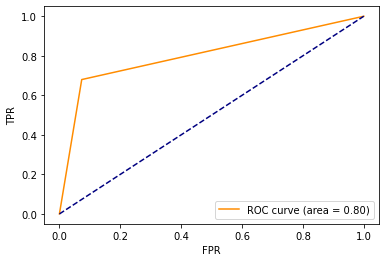

Confusion matrix:
 [[1125  123]
 [  89  261]] 

Area under curve = 0.80318806630972


Algorithm name  Accuracy f1 score test  CV score  \
0       Logistic regression                0.846683  0.819960   
1  Decision tree classifier                0.867334  0.828203   

   F1-CV score diff  Area under curve  
0          0.026724          0.797792  
1          0.039131          0.803188

In [224]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [227]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 87.04%
Accuracy score of test is : 84.98% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1248
           1       0.71      0.54      0.61       350

    accuracy                           0.85      1598
   macro avg       0.79      0.74      0.76      1598
weighted avg       0.84      0.85      0.84      1598



In [228]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8498122653316645
CV score at 2 = 0.7561060787274074
CV score at 3 = 0.7957957123426379
CV score at 4 = 0.767879587417198
CV score at 5 = 0.8046850203330242
CV score at 6 = 0.7860252250748118
CV score at 7 = 0.7970451984474771
CV score at 8 = 0.8071939675146087
CV score at 9 = 0.8112025497876681
CV score at 10 = 0.8154491359813802

Least difference of CV score and F1 score of testing is : 0.034363129350284294


In [236]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(4,11), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[5,6,8,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=6, n_neighbors=10, weights='distance')


In [237]:
#Training model as per best parameters
model = KNeighborsClassifier(leaf_size=6, n_neighbors=10, weights='distance')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 89.92% 

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1248
           1       0.84      0.67      0.74       350

    accuracy                           0.90      1598
   macro avg       0.87      0.82      0.84      1598
weighted avg       0.90      0.90      0.90      1598



In [238]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8992490613266583
CV score at 2 = 0.7907872953933781
CV score at 3 = 0.826598537677511
CV score at 4 = 0.7931679583503511
CV score at 5 = 0.8366130800632913
CV score at 6 = 0.8343590585326123
CV score at 7 = 0.842118442469012
CV score at 8 = 0.859539900622065
CV score at 9 = 0.8716879224207296
CV score at 10 = 0.8810474245689317

Least difference of CV score and F1 score of testing is : 0.01820163675772657


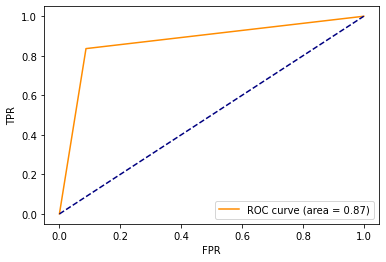

Confusion matrix:
 [[1202   46]
 [ 115  235]] 

Area under curve = 0.8744896332384882


Algorithm name  Accuracy f1 score test  CV score  \
0       Logistic regression                0.846683  0.819960   
1  Decision tree classifier                0.867334  0.828203   
2            KNN classifier                0.899249  0.881047   

   F1-CV score diff  Area under curve  
0          0.026724          0.797792  
1          0.039131          0.803188  
2          0.018202          0.874490

In [239]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [244]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 86.59%
Accuracy score of test is : 86.61% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1248
           1       0.80      0.52      0.63       350

    accuracy                           0.87      1598
   macro avg       0.84      0.74      0.77      1598
weighted avg       0.86      0.87      0.85      1598



In [245]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8660826032540676
CV score at 2 = 0.8090670315515849
CV score at 3 = 0.8136980985970661
CV score at 4 = 0.8135745075529125
CV score at 5 = 0.8202077894801187
CV score at 6 = 0.8202056301229854
CV score at 7 = 0.8252159759609367
CV score at 8 = 0.8298511437288992
CV score at 9 = 0.8363634209180996
CV score at 10 = 0.8323562347671432

Least difference of CV score and F1 score of testing is : 0.029719182335968042


In [253]:
# Hyper parameter tuning for gradient boost model
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'], 
              'n_estimators':[80,90,110,150], 
              'learning_rate' :[0.01, 0.1,1], 
              'loss':['deviance', 'exponential']}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=150)


In [254]:
#Training model as per best parameters
model = GradientBoostingClassifier(learning_rate=1,loss='exponential', n_estimators=150, criterion='friedman_mse')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 97.70%
Accuracy score of test is : 88.74% 

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1248
           1       0.79      0.67      0.72       350

    accuracy                           0.89      1598
   macro avg       0.85      0.81      0.83      1598
weighted avg       0.88      0.89      0.88      1598



In [255]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8873591989987485
CV score at 2 = 0.7788963685949661
CV score at 3 = 0.8039342977134506
CV score at 4 = 0.7841567586851219
CV score at 5 = 0.8316032172338153
CV score at 6 = 0.800799672700499
CV score at 7 = 0.8361086765994743
CV score at 8 = 0.8497655972605873
CV score at 9 = 0.8510225276008816
CV score at 10 = 0.859134224798542

Least difference of CV score and F1 score of testing is : 0.028224974200206532


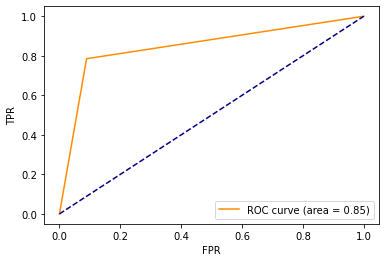

Confusion matrix:
 [[1184   64]
 [ 116  234]] 

Area under curve = 0.8480020650490449


Algorithm name  Accuracy f1 score test  CV score  \
0        Logistic regression                0.846683  0.819960   
1   Decision tree classifier                0.867334  0.828203   
2             KNN classifier                0.899249  0.881047   
3  Gradient boost classifier                0.887359  0.859134   

   F1-CV score diff  Area under curve  
0          0.026724          0.797792  
1          0.039131          0.803188  
2          0.018202          0.874490  
3          0.028225          0.848002

In [256]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boost classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [257]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 91.18% 

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1248
           1       0.90      0.67      0.77       350

    accuracy                           0.91      1598
   macro avg       0.91      0.83      0.86      1598
weighted avg       0.91      0.91      0.91      1598



In [258]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.9117647058823529
CV score at 2 = 0.817956116493799
CV score at 3 = 0.8348605083304345
CV score at 4 = 0.8287229190479105
CV score at 5 = 0.8472535722878396
CV score at 6 = 0.8528881999956379
CV score at 7 = 0.857768874420934
CV score at 8 = 0.8758156954549741
CV score at 9 = 0.8842048079646727
CV score at 10 = 0.888184008205746

Least difference of CV score and F1 score of testing is : 0.023580697676606976


In [275]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[80,90,100,150], 
              'criterion':["entropy",'gini'], 
              'max_depth' :[4, 8, 14, 16, 20], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=150)


In [277]:
#Training model as per best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',n_estimators=150)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 91.36% 

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1248
           1       0.90      0.68      0.77       350

    accuracy                           0.91      1598
   macro avg       0.91      0.83      0.86      1598
weighted avg       0.91      0.91      0.91      1598



In [278]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.9136420525657072
CV score at 2 = 0.8244663827697469
CV score at 3 = 0.8426235303444566
CV score at 4 = 0.8267197263831618
CV score at 5 = 0.845000050940319
CV score at 6 = 0.854766298981175
CV score at 7 = 0.8591461124327031
CV score at 8 = 0.8741860598073024
CV score at 9 = 0.8875845969983512
CV score at 10 = 0.8896858855524291

Least difference of CV score and F1 score of testing is : 0.023956167013278074


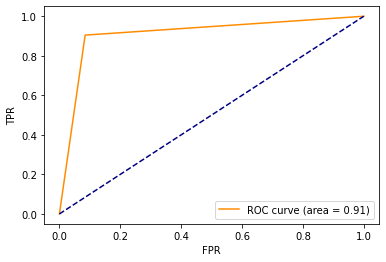

Confusion matrix:
 [[1223   25]
 [ 113  237]] 

Area under curve = 0.9099996571742013


Algorithm name  Accuracy f1 score test  CV score  \
0        Logistic regression                0.846683  0.819960   
1   Decision tree classifier                0.867334  0.828203   
2             KNN classifier                0.899249  0.881047   
3  Gradient boost classifier                0.887359  0.859134   
4   Random forest classifier                0.913642  0.889686   

   F1-CV score diff  Area under curve  
0          0.026724          0.797792  
1          0.039131          0.803188  
2          0.018202          0.874490  
3          0.028225          0.848002  
4          0.023956          0.910000

In [279]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [280]:
#Prediction using selected best model
model = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',n_estimators=150)
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [282]:
table = pd.DataFrame()
table['Actual rain tomorrow'] = ['No' if i==0 else 'Yes' for i in yt]
table['Predicted rain tomorrow'] = ['No' if i==0 else 'Yes' for i in predyt]
table.sample(10)

Actual rain tomorrow Predicted rain tomorrow
252                    No                      No
429                    No                      No
1304                  Yes                     Yes
853                    No                      No
709                    No                      No
692                    No                      No
940                   Yes                     Yes
489                    No                      No
478                    No                      No
566                    No                      No

In [283]:
#Saving the model
import pickle
filename='rain_class.pkl'
pickle.dump(model,open(filename,'wb'))

## Rainfall prediction (Regression approach)

In [337]:
#Seperate feature and target columns
x = df_new.drop('Rainfall', axis=1)
y = df_new['Rainfall']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (7987, 24)
y shape (7987,)


In [338]:
numerical = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
             'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
            'Temp3pm',  'Month', 'Day', 'Year']

In [339]:
x[numerical].skew()

MinTemp         -0.084549
MaxTemp          0.314510
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed3pm     0.300109
WindSpeed9am     0.711395
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Month            0.054460
Day              0.002731
Year             0.430100
dtype: float64

In [340]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in numerical:
    if x.skew().loc[col]>0.55:
        x[col] = po.fit_transform(x[col].values.reshape(-1,1))

In [341]:
#We need to scale the data before applying PCA technique to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)

In [344]:
#VIF method to check multicollinearity 
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif

[1.5961471428567602,
 8.823144122605862,
 26.399082069205452,
 1.5614978253143021,
 1.9822884067624962,
 1.617710425539323,
 2.3257177640037128,
 1.3664034062749224,
 1.4859830486744618,
 1.9924730843981002,
 1.9984056043980294,
 3.971885122602532,
 5.636415466457543,
 19.98115972936267,
 19.132353383574976,
 1.9257353326328603,
 1.8192796706063963,
 17.60788043518487,
 33.29393484935603,
 1.3681279292636825,
 1.446723647251891,
 1.1527432036951222,
 1.004630486251332,
 1.5271432944804404]

VIF value is greater than 5 for some features, high degree of multicollinearity exists

## Feature selection

In [350]:
#Let us drop some high VIF input features and check VIF
x_new = x_new.drop(['MaxTemp','Pressure9am','Temp3pm','MinTemp'], axis=1)

vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif

[1.5933544513887954,
 1.508003402022193,
 1.9273380795305302,
 1.5918216209663565,
 2.249337428220032,
 1.3092149038907681,
 1.4143746047093804,
 1.9186846750223763,
 1.9567224413586166,
 2.7421060931432764,
 2.3232074891940555,
 1.4532530213416146,
 1.8279374317770474,
 1.7996954379953993,
 1.865791569584091,
 1.311329643795751,
 1.434998645665189,
 1.0870339739840058,
 1.0028221871935163,
 1.4948104809263338]

Multicollinearity issue resolved

In [351]:
# Linear regression model
# Selection of best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
model = LinearRegression()
max_r2 = 0
for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.491337978228335
At RS = 0
Max r2 score = 0.49636153973447583
At RS = 1
Max r2 score = 0.4964381982019649
At RS = 9
Max r2 score = 0.5001789768920876
At RS = 10
Max r2 score = 0.5008777037486745
At RS = 11
Max r2 score = 0.5228225989696977
At RS = 13
Max r2 score = 0.5355623925743784
At RS = 67
Max r2 score = 0.5459620854510662
At RS = 325


In [352]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y, random_state=325,test_size=0.2)

#Training the model 
model = LinearRegression()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.5459620854510662 

Mean absolute error = 1.5438074593235305 

Root mean squared error = 3.188903058055028 



In [353]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.47669088268065496
CV score at 5 = 0.4825001402034738
CV score at 6 = 0.47981859072105437
CV score at 7 = 0.47974266031806645
CV score at 8 = 0.4813798307751163
CV score at 9 = 0.48138174865933714
CV score at 10 = 0.48113703835646254
CV score at 11 = 0.4780867479136441

Least difference of CV score and r2 score of testing is : 0.06346194524759236


In [354]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Test r2 score', 'Mean abs error', 'Root mean squared error', 'CV score', 'r2-cv diff'])
model_result.loc[len(model_result.index)] = ['Linear regression', r2_test, mae, rme, cvs, least_diff] 
model_result

Algorithm name  Test r2 score  Mean abs error  Root mean squared error  \
0  Linear regression       0.545962        1.543807                 3.188903   

   CV score  r2-cv diff  
0    0.4825    0.063462

In [356]:
# Lasso regression
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.19605824995638255 

Mean absolute error = 2.51018303518053 

Root mean squared error = 4.243337235514421 



In [357]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.16595888778715964
CV score at 5 = 0.1699391649917667
CV score at 6 = 0.1714861977564772
CV score at 7 = 0.1731997128066146
CV score at 8 = 0.17310261792187595
CV score at 9 = 0.17345325151804958
CV score at 10 = 0.17543053118585264
CV score at 11 = 0.173396897097697

Least difference of CV score and r2 score of testing is : 0.020627718770529907


In [358]:
#Hyperparameter tuning of Lasso model
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 
              'random_state':list(range(10,200,10)), 
              'selection':['cyclic', 'random'],
              'tol':[0.0001,0.001,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Lasso(alpha=0.01, random_state=20, selection='random', tol=0.001)


In [359]:
#Trainig model as per best parameters
model = Lasso(alpha=0.01, random_state=20, selection='random', tol=0.001)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.5450145473740358 

Mean absolute error = 1.5414094966597915 

Root mean squared error = 3.192228807027745 



In [360]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.4769670765659646
CV score at 5 = 0.4825860709723179
CV score at 6 = 0.48000823022817557
CV score at 7 = 0.47980877704010394
CV score at 8 = 0.48142403349568297
CV score at 9 = 0.4814119708486507
CV score at 10 = 0.48119163853957375
CV score at 11 = 0.4781792357557915

Least difference of CV score and r2 score of testing is : 0.062428476401717836


In [361]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Lasso regression', r2_test, mae, rme, cvs, least_diff] 
model_result

Algorithm name  Test r2 score  Mean abs error  Root mean squared error  \
0  Linear regression       0.545962        1.543807                 3.188903   
1   Lasso regression       0.545015        1.541409                 3.192229   

   CV score  r2-cv diff  
0  0.482500    0.063462  
1  0.482586    0.062428

In [362]:
# Ridge regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.5459071413608277 

Mean absolute error = 1.5441689205635936 

Root mean squared error = 3.1890960001766167 



In [363]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.476684680162764
CV score at 5 = 0.48249146901022844
CV score at 6 = 0.4798146602047977
CV score at 7 = 0.4797465152154077
CV score at 8 = 0.48137942691304775
CV score at 9 = 0.4813853108581768
CV score at 10 = 0.4811411143964185
CV score at 11 = 0.47809660659285974

Least difference of CV score and r2 score of testing is : 0.0634156723505993


In [364]:
#Hyperparameter tuning of Ridge model
from sklearn.model_selection import GridSearchCV
model = Ridge()
parameters = {'alpha':[0.001, 0.01,0.1, 1, 10], 
              'random_state':list(range(10,200,10)), 
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
              'tol':[0.0001,0.001,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Ridge(alpha=0.1, random_state=140, solver='sag')


In [365]:
#Trainig model as per best parameters
model = Ridge(alpha=0.1, random_state=140, solver='sag')
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.5458074106355084 

Mean absolute error = 1.5457807501004586 

Root mean squared error = 3.1894461855957394 



In [366]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.47665979747192955
CV score at 5 = 0.48247094773765864
CV score at 6 = 0.47982226986066817
CV score at 7 = 0.4797721693055396
CV score at 8 = 0.4814011138197807
CV score at 9 = 0.48137148866821694
CV score at 10 = 0.4811664347005474
CV score at 11 = 0.478136019389226

Least difference of CV score and r2 score of testing is : 0.06333646289784978


In [367]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Ridge regression', r2_test, mae, rme, cvs, least_diff] 
model_result

Algorithm name  Test r2 score  Mean abs error  Root mean squared error  \
0  Linear regression       0.545962        1.543807                 3.188903   
1   Lasso regression       0.545015        1.541409                 3.192229   
2   Ridge regression       0.545807        1.545781                 3.189446   

   CV score  r2-cv diff  
0  0.482500    0.063462  
1  0.482586    0.062428  
2  0.482471    0.063336

In [368]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.6113159196815584 

Mean absolute error = 1.2888841164540745 

Root mean squared error = 2.9504865109637546 



In [369]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.47921076766765336
CV score at 5 = 0.5125077288680124
CV score at 6 = 0.5109428326707706
CV score at 7 = 0.498309210428954
CV score at 8 = 0.510083171421312
CV score at 9 = 0.5310009638391784
CV score at 10 = 0.5300161914272271
CV score at 11 = 0.5337711589661738

Least difference of CV score and r2 score of testing is : 0.07754476071538463


In [380]:
# Hyper parameter tuning of Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              'n_estimators':[100,150,200,300], 
              'max_depth' : [4,6,8,10,12],
              'learning_rate' : [0.01,0.1,1],
              'tol' : [0.0001,0.01,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150)


In [381]:
# Training for best parameter
model = GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.7054837843554652 

Mean absolute error = 0.9355472296171968 

Root mean squared error = 2.568324310314519 



In [382]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.4459912802056023
CV score at 5 = 0.5641469798046713
CV score at 6 = 0.563133517848154
CV score at 7 = 0.5849757548217535
CV score at 8 = 0.597039338572925
CV score at 9 = 0.6318701817558958
CV score at 10 = 0.6463192480764205
CV score at 11 = 0.6623101461163097

Least difference of CV score and r2 score of testing is : 0.04317363823915554


In [383]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boosting regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

Algorithm name  Test r2 score  Mean abs error  \
0            Linear regression       0.545962        1.543807   
1             Lasso regression       0.545015        1.541409   
2             Ridge regression       0.545807        1.545781   
3  Gradient boosting regressor       0.705484        0.935547   

   Root mean squared error  CV score  r2-cv diff  
0                 3.188903  0.482500    0.063462  
1                 3.192229  0.482586    0.062428  
2                 3.189446  0.482471    0.063336  
3                 2.568324  0.662310    0.043174

In [384]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.6907688753438062 

Mean absolute error = 1.0129406843312851 

Root mean squared error = 2.631702886682235 



In [385]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.49357012274306833
CV score at 5 = 0.5729957978729316
CV score at 6 = 0.5797016800611882
CV score at 7 = 0.5994547534777909
CV score at 8 = 0.6089957638455046
CV score at 9 = 0.6423775033224406
CV score at 10 = 0.648070302394504
CV score at 11 = 0.6589196697874301

Least difference of CV score and r2 score of testing is : 0.03184920555637605


In [ ]:
#Hyper parameter tuning for random forest regressor
model = RandomForestRegressor()
parameters = {'n_estimators':[100,200,300,400,500], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[4,6,8,10,12], 
              'max_features' : ["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

In [396]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

Algorithm name  Test r2 score  Mean abs error  \
0            Linear regression       0.545962        1.543807   
1             Lasso regression       0.545015        1.541409   
2             Ridge regression       0.545807        1.545781   
3  Gradient boosting regressor       0.705484        0.935547   
4      Random forest regressor       0.695058        1.006380   

   Root mean squared error  CV score  r2-cv diff  
0                 3.188903  0.482500    0.063462  
1                 3.192229  0.482586    0.062428  
2                 3.189446  0.482471    0.063336  
3                 2.568324  0.662310    0.043174  
4                 2.613387  0.658920    0.031849

GB regressor is giving best results with highest Test R2 score, least MAE, least RMSE, least diff between R2 score of test and CV score ensuring minimum overfitting of model curve

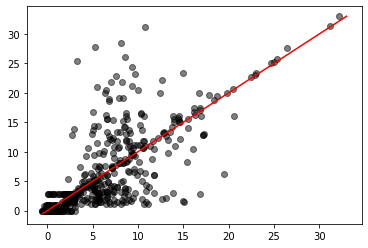

In [400]:
#Predicted data vs actual test data
model = GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150)
model.fit(xtr,ytr)
predyt = model.predict(xt)
actualyt = yt
plt.figure()
plt.scatter(predyt, actualyt, color = 'k', alpha=0.5)
plt.plot([min(predyt),max(actualyt)], [min(predyt),max(actualyt)], 'k-', color = 'r')
plt.show()

In [401]:
#Saving the model
import pickle
filename='rain_reg.pkl'
pickle.dump(model,open(filename,'wb'))